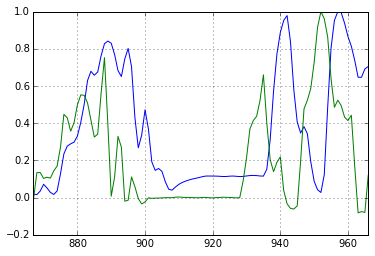

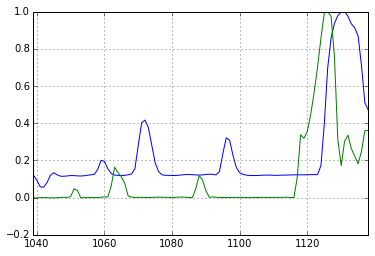

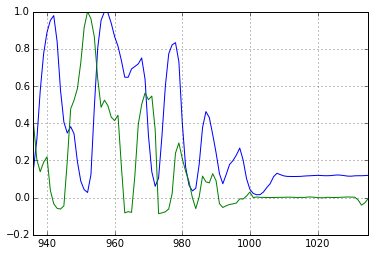

ValueError: attempt to get argmax of an empty sequence

In [3]:
import matplotlib as mt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab as plt
from scipy import signal
from functools import reduce
import scipy
import time
%matplotlib inline

data = pd.read_csv("ftp_or.csv")
data = data.convert_objects(convert_numeric=True)
data = data.dropna()
pct = data.C_TRQENG.pct_change()
nlarge = pct.nlargest(5)
zone_delays = []

fig = plt.figure()

for ind in nlarge.index:

    high = ind + 50
    low = ind - 50

    torq = data.C_TRQENG[low:high]
    spec = data.E_CO2D[low:high]

    torq = torq/torq.loc[torq.abs().idxmax()].astype(np.float64)
    spec = spec/spec.loc[spec.abs().idxmax()].astype(np.float64)
  
   
    spec.plot()
    torq.plot()
  
    plt.pause(1)
    plt.show()
    
    torq_diff = torq.diff()
    spec_diff = spec.diff()

    flat_line_count = 0
    delay = 0
    delays = []
    t_spike = False
    flat_line = False

    for s, t in zip(spec_diff, torq_diff):
    
        if t < 0.01 and t > 0:
            flat_line_count = flat_line_count + 1
        
        if flat_line_count > 3:
            flat_line = True
               
        if flat_line == True:
            if(t > 0.25):
                t_spike = True
            
        if t_spike == True:
            if(s > 0.1):
                delays.append(delay)
                delay = 0
                t_spike = False
                flat_line = False
                flat_line_count = 0
            delay = delay + 1
            
    
    if len(delays) != 0:
        delay = np.mean(delays)  
        zone_delays.append(delay)
        
  
delay = np.mean(zone_delays)
    


    

In [2]:

print(delay)

print("SHIFTED")
high, low = 0, 0


for ind in nlarge.index:

    high = ind + 50
    low = ind - 50

    torq = data.C_TRQENG[low:high]
    spec = data.E_CO2D[low:high]

    torq = torq/torq.loc[torq.abs().idxmax()].astype(np.float64)
    spec = spec/spec.loc[spec.abs().idxmax()].astype(np.float64)
  
    spec = spec.shift(-(delay))

    spec.plot()
    torq.plot()
    
    plt.pause(1)
    plt.show()
    

NameError: name 'delay' is not defined

In [4]:
data


,Date,Time,SP_Thro,UDPi_SpeedDemand,C_SPDDYN,C_SPDDEV,UDPi_TorqueDemand,C_TRQENG,C_BHP,U_BPOW,...,NOX_PPM_D1,NOX_PPM_D2,NO_PPM_D1,NO_PPM_D2,O2_PCT_D1,O2_PCT_D2,HC_PPM,HC_PPM_W1,HC_PPM_W2,EGR_MASS
1,2/3/2015,8:43:30 AM,0,600.000,77.302,3.857,0.000,-274.577,-1.949,-1.453,...,0.971,1.181,0.869,0.657,20.846,20.856,4.948,8.437,1.460,-6.393
2,2/3/2015,8:43:31 AM,0,600.000,277.953,6.825,0.000,-39.954,-1.529,-1.140,...,0.785,1.194,0.720,0.619,20.846,20.860,5.224,8.607,1.842,-18.587
3,2/3/2015,8:43:32 AM,0,600.000,477.478,10.734,0.000,-8.593,-0.524,-0.390,...,0.957,1.119,0.720,0.583,20.846,20.860,5.240,8.690,1.791,-34.348
4,2/3/2015,8:43:33 AM,0,600.000,598.696,8.114,0.000,0.295,0.025,0.019,...,0.859,1.244,0.882,0.633,20.849,20.864,5.056,8.397,1.714,-59.163
5,2/3/2015,8:43:34 AM,0,600.000,597.155,2.664,0.000,0.992,0.083,0.062,...,0.908,1.131,0.770,0.669,20.845,20.861,5.147,8.402,1.893,-62.635
6,2/3/2015,8:43:35 AM,0,600.000,597.076,-4.728,0.000,1.723,0.144,0.108,...,0.846,1.343,0.844,0.595,20.848,20.851,10.633,19.450,1.816,-70.490
7,2/3/2015,8:43:36 AM,0,600.000,598.301,-9.616,0.000,0.551,0.046,0.035,...,0.847,1.269,2.866,0.682,20.848,20.857,25.627,49.539,1.714,-71.594
8,2/3/2015,8:43:37 AM,0,600.000,598.877,-10.881,0.000,3.403,0.286,0.213,...,5.921,1.194,30.318,0.682,20.827,20.867,31.060,60.482,1.638,2.478
9,2/3/2015,8:43:38 AM,0,600.000,599.042,-11.243,0.000,6.878,0.579,0.432,...,31.668,0.957,56.258,0.545,20.668,20.859,31.414,61.215,1.612,0.470
10,2/3/2015,8:43:39 AM,0,600.000,598.902,-11.406,0.000,8.285,0.697,0.520,...,57.849,1.181,86.366,0.483,20.371,20.864,30.610,59.557,1.663,0.255
